In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Data Exploration and Preprocessing



In [ ]:
twitter = pd.read_csv("Twitter_Data.csv",usecols=['clean_text'])
print("Shape of dataset ",twitter.shape)
twitter

Shape of dataset  (162980, 1)


,clean_text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...
...,...
162975,why these 456 crores paid neerav modi not reco...
162976,dear rss terrorist payal gawar what about modi...
162977,did you cover her interaction forum where she ...
162978,there big project came into india modi dream p...


In [ ]:
print("Data size before preprocessing: ",len(twitter))
print("Empty Datas :")
twitter.isnull().sum()

Data size before preprocessing:  162980
Empty Datas :


clean_text    4
dtype: int64

In [ ]:
twitter.describe()

,clean_text
count,162976
unique,162976
top,when modi promised “minimum government maximum...
freq,1


In [ ]:
twitter.duplicated().sum()

3

In [ ]:
twitter.value_counts()[:10]

clean_text                                                                                                                                                                                                   
\n\nasat missile project began two years ago had the concurrence from the says drdo chairman\n                                                                                                                   1
sab gareeb jaise year modi government gaye hain actually pappu having nothing except making some fake promises                                                                                                   1
sab chor specially this duo bunty modi and bubbly shah                                                                                                                                                           1
sab chowkidar imandar hai mam chodkar dont make chowkidar fool care about chowkidar then fight increase there salary this will not happened last year indian peop

In [ ]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162976 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
twitter.dropna(inplace=True)
twitter

,clean_text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...
...,...
162975,why these 456 crores paid neerav modi not reco...
162976,dear rss terrorist payal gawar what about modi...
162977,did you cover her interaction forum where she ...
162978,there big project came into india modi dream p...


In [ ]:
twitter.isnull().sum()

clean_text    0
dtype: int64

In [ ]:
def DatasetTargetToArray(dataset,label_target=None):
  if label_target != None:
    arr = dataset[[label_target]].to_numpy()
    label = []
    for i in arr:
      label.append(i[0])
    return dataset.drop(columns=[label_target]).to_numpy(),np.array(label)
  else: return dataset.to_numpy()

arr = DatasetTargetToArray(twitter)
arr[:10]

array([['when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'],
       ['talk all the nonsense and continue all the drama will vote for modi '],
       ['what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax'],
       ['asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars'],
       ['answer who among these the most powerful world leader today trump putin modi may '],
       ['kiya tho refresh maarkefir comment karo '],
       ['surat women perform yagna seeks divine grace for narendra modi become again\n'],
       ['this comes from cabinet which has scholars like modi smriti and hema time introspect'],
       

# NGRAM LANGUAGE MODEL

In [ ]:
def cleaningTweet(text):
  ans = text.replace("RT ", "")
  ans = ans.replace("RT", "")
  ans = re.sub(r'[^\w\s]','',ans)
  ans = ans + " <eos>"
  ans = re.sub('\\s+', ' ', ans).lower()
  return ans

cleaningTweet("surat women perform yagna seeks divine grace for narendra modi become again\n")

'surat women perform yagna seeks divine grace for narendra modi become again <eos>'

In [ ]:
def generate_N_grams(text,ngram=1):
  #separete split by white space and then remove the stopwords
  text = cleaningTweet(text)
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
  #print(text,words)
  ans = []
  i=0
  while 1:
    wgram=[]
    for w in words[i:ngram+i] :
      wgram.append(w)

    ans.append(tuple(wgram))
    if wgram[len(wgram)-1]==words[len(words)-1]:
      break
    i+=1
  #temp=zip(*[words[i:] for i in range(0,ngram)])
  #ans=[' '.join(ngram) for ngram in temp]
  return ans

generate_N_grams("surat women perform yagna seeks divine grace for narendra modi become again\n",3)

[('surat', 'women', 'perform'),
 ('women', 'perform', 'yagna'),
 ('perform', 'yagna', 'seeks'),
 ('yagna', 'seeks', 'divine'),
 ('seeks', 'divine', 'grace'),
 ('divine', 'grace', 'narendra'),
 ('grace', 'narendra', 'modi'),
 ('narendra', 'modi', 'become'),
 ('modi', 'become', '<eos>')]

In [ ]:
def N_Grams(arr,ngram=1,dataframe=True):

  values = {}
  for i in range(len(arr)):
    text = arr[i][0]
    #print(text)
    for word in generate_N_grams(text,ngram):
      try:
        values[word]+=1
      except :
        values[word]=1
  if not dataframe :
    return sorted(values.items(),key=lambda x:x[1],reverse=True)
  return pd.DataFrame(sorted(values.items(),key=lambda x:x[1],reverse=True))

dfgram = N_Grams(arr[:100],3)
dfgram.head(10)

,0,1
0,"(via, namo, app)",3
1,"(namo, app, <eos>)",3
2,"(one, vote, make)",2
3,"(vote, make, difference)",2
4,"(make, difference, anil)",2
5,"(difference, anil, kapoor)",2
6,"(anil, kapoor, answers)",2
7,"(kapoor, answers, modis)",2
8,"(answers, modis, election)",2
9,"(modis, election, 2019)",2


In [ ]:
N_Grams(arr[:100],3,dataframe=False)

[(('vote', 'modi'), 8),
 (('narendra', 'modi'), 8),
 (('modi', '<eos>'), 5),
 (('modi', 'govt'), 5),
 (('new', 'india'), 5),
 (('modi', 'govts'), 4),
 (('modi', 'government'), 4),
 (('modi', 'great'), 3),
 (('vote', 'kar'), 3),
 (('campaign', '<eos>'), 3),
 (('modi', 'bjp'), 3),
 (('via', '<eos>'), 3),
 (('corruption', 'free'), 3),
 (('via', 'namo'), 3),
 (('namo', 'app'), 3),
 (('app', '<eos>'), 3),
 (('prime', 'minister'), 3),
 (('exit', 'psus'), 2),
 (('like', 'modi'), 2),
 (('minister', 'modi'), 2),
 (('modi', 'cabinet'), 2),
 (('one', 'vote'), 2),
 (('vote', 'make'), 2),
 (('make', 'difference'), 2),
 (('difference', 'anil'), 2),
 (('anil', 'kapoor'), 2),
 (('kapoor', 'answers'), 2),
 (('answers', 'modis'), 2),
 (('modis', 'election'), 2),
 (('election', '2019'), 2),
 (('2019', 'clarion'), 2),
 (('clarion', 'call'), 2),
 (('call', 'extends'), 2),
 (('extends', 'support'), 2),
 (('bjp', 'party'), 2),
 (('vote', 'ensure'), 2),
 (('ensure', 'govt'), 2),
 (('govt', 'need'), 2),
 (('ne

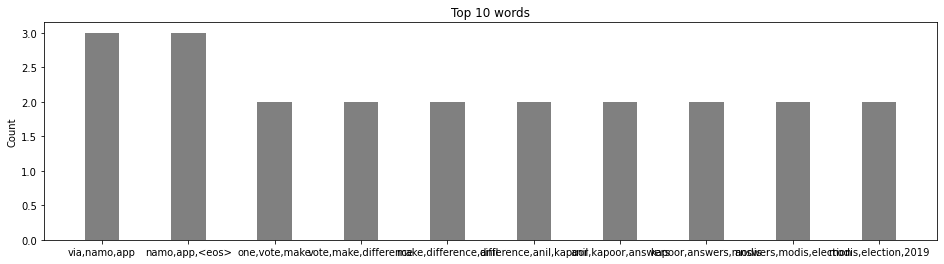

In [ ]:
def topWords(keytuple,value,sentiment="", color='gray', top=10):
  key = [','.join(ngram) for ngram in keytuple]
  plt.figure(1,figsize=(16,4))
  plt.bar(key[:top],value[:top], color =color,
          width = 0.4)
  plt.xlabel(sentiment)
  plt.ylabel("Count")
  plt.title("Top "+str(top)+" words")
  plt.show()

topWords(dfgram[0],dfgram[1])

In [ ]:
def calculateChances(keytuple,dataset,n=2):
  chance = {}
  idxn = len(keytuple) - n + 1
  ngram = N_Grams(dataset,n,dataframe=False)
  #print(ngram)
  for ng in ngram :
    match = True
    for i in range(n-1):
      #print(keytuple[idxn+i], ng[0][i])
      #print(len(keytuple),idxn, i, idxn+i)
      if keytuple[idxn+i] != ng[0][i]:
        match = False
        break
    #print(keytuple,ng[0],keytuple in ng[0])
    if match :
      #print(keytuple,ng[0])
    #if keytuple in ng[0]:
      #print(ng[1],len(ngram),ng[1]/len(ngram))
      chance[ng[0][len(ng[0])-1]] = ng[1]/len(ngram)

  return chance

calculateChances(("narendra", "modi"),arr[:100],3)

{'<eos>': 0.0007662835249042146,
 'amit': 0.0007662835249042146,
 'appeals': 0.0007662835249042146,
 'become': 0.0007662835249042146,
 'bjp': 0.0015325670498084292,
 'brothers': 0.0007662835249042146,
 'producer': 0.0007662835249042146}

In [ ]:
def predict(keytuple,dataset, n=2):
  while 1:
    chances = calculateChances(keytuple,dataset,n)
    lkey = list(keytuple)
    #print(lkey)
    try:
      wordpath = max(chances, key=chances.get)
      #print(wordpath)
      #lkey.append(wordpath)
      if wordpath == "" or wordpath == "<eos>":
        print("Predict sentence:",' '.join(keytuple))
        break

      lkey.append(wordpath)
      print(' '.join(keytuple))
    except:
      break
    keytuple = tuple(lkey)

predict(("narendra", "modi"),arr[:100],3)

narendra modi
narendra modi bjp
Predict sentence: narendra modi bjp party


In [ ]:
def predictSentence(sentence,dataset,n=2):
  text = sentence.replace("RT ", "")
  text = text.replace("RT", "")
  text = re.sub(r'[^\w\s]','',text)
  text = re.sub('\\s+', ' ', text).lower()
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
  kt = tuple(words)
  predict(kt,dataset,n)

predictSentence("narendra modi",arr[:100],3)

narendra modi
narendra modi bjp
Predict sentence: narendra modi bjp party


#NEURAL LANGUAGE MODEL

source : https://machinelearningmastery.com/develop-word-based-neural-language-models-python-keras/

In [ ]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sentence='Do not let the day end without having grown a little,'
def wordProcess(sentence):
  text = sentence.replace("RT ", "")
  text = text.replace("RT", "")
  text = re.sub(r'[^\w\s]','',text)
  text = re.sub('\\s+', ' ', text).lower()
  return [word for word in text.split(" ")]
wordProcess(sentence)

['do',
 'not',
 'let',
 'the',
 'day',
 'end',
 'without',
 'having',
 'grown',
 'a',
 'little']

In [ ]:
tokens = twitter.apply(lambda row: row['clean_text'], axis=1)[:100]
tokens

0     when modi promised “minimum government maximum...
1     talk all the nonsense and continue all the dra...
2     what did just say vote for modi  welcome bjp t...
3     asking his supporters prefix chowkidar their n...
4     answer who among these the most powerful world...
                            ...                        
95    country prospers when the women the country ar...
96                 sabbash mera vote for peppermit abvp
97    yogi adityanath hold 100 rallies seek votes fo...
98    from the very beginningmodi doing wada faramos...
99    modi politics hate modiji loves india modiji w...
Length: 100, dtype: object

In [ ]:
def vocabList(sentences):
  vocabs = {}
  i = 1
  for row in sentences:
    for word in wordProcess(row):
      if vocabs.get(word) == None:
        vocabs[word] = i
        i += 1
  return vocabs

vocabs = vocabList(tokens)
print('Vocabulary Size: %d' % len(vocabs))
print(vocabs)

Vocabulary Size: 970
{'when': 1, 'modi': 2, 'promised': 3, 'minimum': 4, 'government': 5, 'maximum': 6, 'governance': 7, 'expected': 8, 'him': 9, 'begin': 10, 'the': 11, 'difficult': 12, 'job': 13, 'reforming': 14, 'state': 15, 'why': 16, 'does': 17, 'take': 18, 'years': 19, 'get': 20, 'justice': 21, 'should': 22, 'and': 23, 'not': 24, 'business': 25, 'exit': 26, 'psus': 27, 'temples': 28, 'talk': 29, 'all': 30, 'nonsense': 31, 'continue': 32, 'drama': 33, 'will': 34, 'vote': 35, 'for': 36, '': 37, 'what': 38, 'did': 39, 'just': 40, 'say': 41, 'welcome': 42, 'bjp': 43, 'told': 44, 'you': 45, 'rahul': 46, 'main': 47, 'campaigner': 48, 'think': 49, 'relax': 50, 'asking': 51, 'his': 52, 'supporters': 53, 'prefix': 54, 'chowkidar': 55, 'their': 56, 'names': 57, 'great': 58, 'service': 59, 'now': 60, 'there': 61, 'confusion': 62, 'read': 63, 'crustal': 64, 'clear': 65, 'crass': 66, 'filthy': 67, 'nonsensical': 68, 'see': 69, 'how': 70, 'most': 71, 'abuses': 72, 'are': 73, 'coming': 74, 'fro

In [ ]:
def encodeSentence(sentence, vocabs):
  encode = []
  for word in wordProcess(sentence):
    encode.append(vocabs.get(word))
  return encode

def encodeSequence(sentences, vocabs):
  sequences = list()
  for line in sentences:
    encoded = encodeSentence(line, vocabs)
    for i in range(1, len(encoded)):
      sequence = encoded[:i+1]
      sequences.append(sequence)

  max_length = max([len(seq) for seq in sequences])
  return pad_sequences(sequences, maxlen=max_length, padding='pre'), max_length

encoded,max_length = encodeSequence(tokens, vocabs)
encoded

array([[  0,   0,   0, ...,   0,   1,   2],
       [  0,   0,   0, ...,   1,   2,   3],
       [  0,   0,   0, ...,   2,   3,   4],
       ...,
       [  0,   0,   0, ..., 207, 968, 969],
       [  0,   0,   0, ..., 968, 969, 970],
       [  0,   0,   2, ..., 969, 970, 167]], dtype=int32)

In [ ]:
sequences = np.array(encoded)
count_vocab = len(vocabs)+1
print(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=count_vocab)

[[  0   0   0 ...   0   1   2]
 [  0   0   0 ...   1   2   3]
 [  0   0   0 ...   2   3   4]
 ...
 [  0   0   0 ... 207 968 969]
 [  0   0   0 ... 968 969 970]
 [  0   0   2 ... 969 970 167]]


In [ ]:
# generate a sequence from a language model
def predict(model, tokenizer, max_length, seed_text, n_words):
  in_text = seed_text
	# generate a fixed number of words
  for _ in range(n_words):
    #in_text = wordProcess(in_text)
    # encode the text as integer
    print(in_text)
    encoded = encodeSentence(in_text, vocabs)
		# predict probabilities for each word
		#yhat = model.predict_classes(encoded, verbose=0)
    #print(encoded)
    encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
    yhat = (model.predict(encoded) > 0.5).astype("int32")
    # map predicted word index to word
    out_word = ''
    #print(tokenizer.word_index.items(),yhat[0])
    #print(yhat[0])
    for word, index in vocabs.items():
      #print(index,word)
      if yhat[0][index] == 1:
        out_word = word
        break
      # append to input
    if out_word != '':
      in_text += ' ' + out_word
  return in_text

In [ ]:
# define model
model = Sequential()
model.add(Embedding(count_vocab, 10, input_length=max_length-1))
model.add(LSTM(50))
model.add(Dense(count_vocab, activation='softmax'))
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 39, 10)            9710      
                                                                 
 lstm_1 (LSTM)               (None, 50)                12200     
                                                                 
 dense_1 (Dense)             (None, 971)               49521     
                                                                 
Total params: 71,431
Trainable params: 71,431
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, y, epochs=500, verbose=2)

Epoch 1/500
63/63 - 7s - loss: 6.7660 - accuracy: 0.0266 - 7s/epoch - 109ms/step
Epoch 2/500
63/63 - 2s - loss: 6.3291 - accuracy: 0.0361 - 2s/epoch - 33ms/step
Epoch 3/500
63/63 - 1s - loss: 6.2499 - accuracy: 0.0411 - 1s/epoch - 22ms/step
Epoch 4/500
63/63 - 1s - loss: 6.2231 - accuracy: 0.0411 - 1s/epoch - 21ms/step
Epoch 5/500
63/63 - 2s - loss: 6.1970 - accuracy: 0.0411 - 2s/epoch - 31ms/step
Epoch 6/500
63/63 - 1s - loss: 6.1638 - accuracy: 0.0411 - 1s/epoch - 21ms/step
Epoch 7/500
63/63 - 1s - loss: 6.1198 - accuracy: 0.0411 - 1s/epoch - 21ms/step
Epoch 8/500
63/63 - 1s - loss: 6.0693 - accuracy: 0.0411 - 1s/epoch - 21ms/step
Epoch 9/500
63/63 - 1s - loss: 6.0193 - accuracy: 0.0411 - 1s/epoch - 21ms/step
Epoch 10/500
63/63 - 1s - loss: 5.9701 - accuracy: 0.0411 - 1s/epoch - 21ms/step
Epoch 11/500
63/63 - 1s - loss: 5.9269 - accuracy: 0.0411 - 1s/epoch - 21ms/step
Epoch 12/500
63/63 - 1s - loss: 5.8827 - accuracy: 0.0411 - 1s/epoch - 21ms/step
Epoch 13/500
63/63 - 1s - loss: 5.84

In [ ]:
print(predict(model, vocabs, max_length-1, 'narendra modi', 6))

narendra modi
narendra modi the
narendra modi the dollar
narendra modi the dollar india
narendra modi the dollar india handled
narendra modi the dollar india handled exceptionally
narendra modi the dollar india handled exceptionally well
